## Scenario: Predict Employee Attrition using Classification Algorithms




Employee retention is one of the biggest metrics that a company should have in mind when thinking of growth. Employee attrition is caused when the total strength of the company is greatly reduced as more employees leave the company than expected.

So, what is **Attrition**?
It is basically the turnover rate of employees in a particular organization

Reasons for **Attrition**:

- Employees looking for better opportunities
- A negative working environment
- Bad management
- Sickness of an employee
- Excessive working hours

### Problem Statement
Uncover the factors that lead to employee attrition and explore the reasons as to why people are leaving the organization and predict whether an employee will leave the organization or not by creating a Web App using Streamlit that takes inputs from user's online





### Dataset Description
The data set contains the following attributes:

- **satisfaction_level** 
- **last_evaluation**
- **number_project**
- **average_montly_hours**
- **time_spend_company**
- **Work_accident**
- **quit**
- **promotion_last_5years**
- **department**
- **salary**

### Tasks to be performed:
- Import required libraries and load the data set from Dropbox
- Perform Exploratory Data Analysis (EDA) on the data set
  -  Generate a Data Report using Pandas Profiling and record your observations
  - Plot **Univariate Distributions**
    - What is the distribution of the average_montly_hours & average_montly_hours columns in the data set?
    - What's the Attrition percentage in the company?
    - Which Department of the company has the highest Attrition rate?
  - Plot **Bi-Variate Distributions**
    - How does salary affect the attrition rate?
    - Do experienced employees tend to leave the company if they are not satisfied?
    - Which department executes the most number of projects?
- Pre-process that data set for modeling
  - Handle Missing values present in the data set
  - Encode the categorical variables present
  - Split the data into training and testing set using sklearn's **train_test_split** function
- Modelling
  - Build and evaluate an Interactive **Decision Tree** Model
  - Build and evaluate an Interactive **Random Forest** Model
- Implement **GridSearchCV** & **RandomizedSearchCV**
- Interpret Employee Attrition Prediction Model With **SHAP**
- Use **PyCaret** to find the best model and perform Automatic Hyperparameter tuning 

  - Import PyCaret and load the data set
  - Initialize or setup the environment 
  - Compare Multiple Models and their Accuracy Metrics
  - Create the model
  - Tune the model
  - Evaluate the model
- Deploy the model using **Streamlit** using the model pickle file 

### Installing Dependencies

**Note:** After Insalling Pandas Profiling, restart the kernel and run from the top excluding the installation cell

- It's better to install all th libraries at the top

In [ ]:
#Intalling Pandas-Profiling
#!pip install pandas-profiling==2.7.1


### Data and imports

[**Click Here**](https://www.dropbox.com/s/d18ektpwkx91khj/employee_data.csv?dl=0) to download the dataset

In [1]:
!wget https://www.dropbox.com/s/d18ektpwkx91khj/employee_data.csv

--2023-02-12 03:04:19--  https://www.dropbox.com/s/d18ektpwkx91khj/employee_data.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/d18ektpwkx91khj/employee_data.csv [following]
--2023-02-12 03:04:20--  https://www.dropbox.com/s/raw/d18ektpwkx91khj/employee_data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc27f4d849407e94551c23294087.dl.dropboxusercontent.com/cd/0/inline/B2U9wrFMNFB_tUQQW8gjdIZ5u-YTKAKWiL7v6igYTZna6B7pLoeY5bmsfy9MT4ciurGlpb_MWQ1El73c2cO47G1Iqr08oKwqCMzK7nwG4BCMmX4IeAtJYI21pCoiwVu_V2xh6Fl-b7G9tJOn01Ol8CCKi-uYeohrCytELid9-uASrw/file# [following]
--2023-02-12 03:04:20--  https://uc27f4d849407e94551c23294087.dl.dropboxusercontent.com/cd/0/inline/B2U9wrFMNFB_tUQQW8gjdIZ5u-YTKAKWiL7v6igYTZna6B7pLoeY5bmsfy9MT4

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from pandas_profiling import ProfileReport
sns.set()

import warnings
warnings.filterwarnings("ignore")    
import os

In [3]:
#Loading the dataset

df = pd.read_csv('employee_data.csv')
print(df.shape)
df.head() #Printing the first 5 rows of dataframe

(14999, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
print(df.quit.unique())
print(df.quit.value_counts())

[1 0]
0    11428
1     3571
Name: quit, dtype: int64


In [ ]:
df.department.unique(), df.salary.unique()

(array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
        'IT', 'product_mng', 'marketing', 'RandD'], dtype=object),
 array(['low', 'medium', 'high'], dtype=object))

### Exploratory Data Analysis

**Note:** If you want to learn more about Pandas-Profiling [**Click Here!**](https://pypi.org/project/pandas-profiling/)

In [ ]:
import pandas_profiling
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html') #Generating a Data Report

In [ ]:
# import pandas_profiling
# from pandas_profiling import ProfileReport
# ProfileReport(df).to_notebook_iframe()

Please refer to the HTML file created by the name of **output.html**

**Observations:**
- There are **10** variables or features in the dataframe and the total number of instances or rows are **14999**
- We have **5** Numeric, **3** Boolean, and **2** Categorical variables
- We have **2** Categorical Variables namely **Department** and **Salary**
- The **Salary** column is divided into **low**, **medium**, and **high** 
- There are no missing cells in the dataset which is a big relief

#### Plotting Univariate Distributions
A **Univariate distribution** is a probability distribution of only one random variable

**Note:** You have already seen this in Pandas Profiling. Still, if you want to write the code, you can do so.

What is the distribution of the **average_montly_hours** & **satisfaction_level** columns in the data set?


In [ ]:
import plotly.express as px
fig = px.histogram(df, x = 'average_montly_hours')
fig.show()

___
**Observations:**
- Most of the employees work between 125 and 265 hours monthly
- Very few employees spend less than 140 and more than 265 working on a monthly basis
___

In [ ]:
fig = px.histogram(df, x = 'satisfaction_level')
fig.show()

___
**Observations:**
- More than 800 employees are not satasfied with their work and may leave the company
- Most of the employees are quite content with their job
___

**What's the Attrition percentage in the company?**


In [ ]:
round((df.quit.value_counts()/df.shape[0])*100,2)

0    76.19
1    23.81
Name: quit, dtype: float64

**Observations:**
- 76% of employees did not leave the organization while 24% did leave

**Which Department of the company has the highest Attrition rate?**

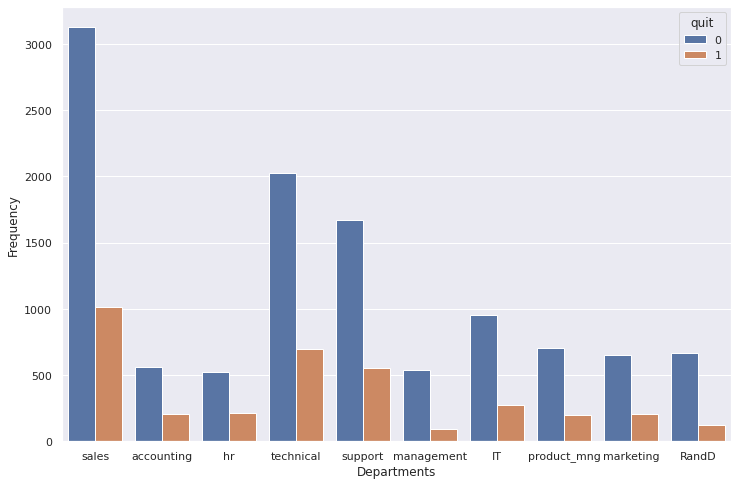

In [ ]:
%matplotlib inline
plt.figure(figsize=(12,8))

sns.countplot(data=df,x=df['department'],hue="quit")

plt.xlabel('Departments')
plt.ylabel('Frequency')

plt.show()

**Observations:**
- **Sales** department has the highest attrition or turnover rate followed by **technical**, and **support** departments
- **Management** recorded the lowest number of employees leaving the company

#### Bi-variate Distributions
- A Bi-variate distribution is a distribution of two random variables
- The concept generalizes to any number of random variables, giving a **Multivariate Distribution**

**How does salary affect the attrition rate?**

In [ ]:
df_new = pd.crosstab(df['salary'], df['quit'])
df_new

quit,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


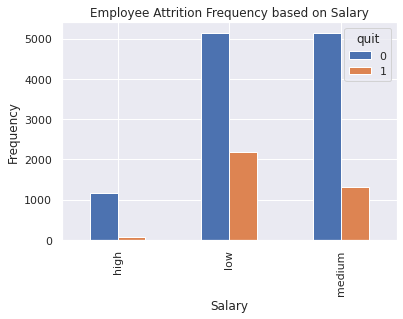

In [ ]:
df_new = pd.crosstab(df['salary'], df['quit'])

df_new.plot(kind = 'bar')

plt.title('Employee Attrition Frequency based on Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.show()

**Observations:**
- People with **low** salary are more likely to quit as compared to people with **medium** and **high** salaries
- People with **high** salary are very less likely to leave the organization
- Salary seems to be a significant factor in determining the turnover rate in employees

In [ ]:
# # Do experienced employees tend to leave the company if they are not satisfied?
# px.scatter(df, x=df['satisfaction_level'],y=df['time_spend_company'],color=df['quit'])
# # Which department executes the most number of projects?
# fig = px.box(df, x="department",y="number_project")
# fig.show()

### Create Training and Testing Set

In [4]:
X = df.drop('quit', axis = 1)
y = df.quit

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.2, stratify = y)
# parameter 'stratify' ensures the training and test subsets that have the same proportions of class

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X.shape, y.shape

((11999, 9), (3000, 9), (11999,), (3000,), (14999, 9), (14999,))

### Data Pre-processing

#### Encode Categorical Variables

The dataset contains **2** Categorical Variables:

- **department**
- **salary**

We have to encode them before modelling because scikit learn doesn't accept string data as input

In [ ]:
X_train['salary']

6026       high
11511    medium
13663      high
11239      high
676         low
          ...  
7752     medium
7826     medium
9165        low
9291        low
9055        low
Name: salary, Length: 11999, dtype: object

In [ ]:
sal = pd.get_dummies(X_train['salary'], prefix='sal')
sal.head()
# sal = pd.get_dummies(X_train['salary'], prefix='salary')
# sal.head()

,sal_high,sal_low,sal_medium
6026,1,0,0
11511,0,0,1
13663,1,0,0
11239,1,0,0
676,0,1,0


In [ ]:
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
6026,0.49,0.46,2,129,2,0,0,RandD,high
11511,0.72,0.88,5,216,10,1,0,support,medium
13663,0.82,0.51,2,268,2,0,0,management,high
11239,0.82,0.85,3,214,2,0,0,support,high
676,0.11,0.82,6,270,4,0,0,product_mng,low


In [6]:
cat_vars = ['department', 'salary']

for var in cat_vars:
    dfenc = pd.get_dummies(X_train[var], prefix=var)
    X_train = X_train.join(dfenc)
    dfenc = pd.get_dummies(X_test[var], prefix=var)
    X_test = X_test.join(dfenc)

In [7]:
print(X_train.shape)
X_train.head()

(11999, 22)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,department_IT,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
6026,0.49,0.46,2,129,2,0,0,RandD,high,0,...,0,0,0,0,0,0,0,1,0,0
11511,0.72,0.88,5,216,10,1,0,support,medium,0,...,0,0,0,0,0,1,0,0,0,1
13663,0.82,0.51,2,268,2,0,0,management,high,0,...,0,1,0,0,0,0,0,1,0,0
11239,0.82,0.85,3,214,2,0,0,support,high,0,...,0,0,0,0,0,1,0,1,0,0
676,0.11,0.82,6,270,4,0,0,product_mng,low,0,...,0,0,0,1,0,0,0,0,1,0


In [8]:
#Let us drop the department and salary columns

X_train.drop(columns=['department', 'salary'], axis = 1, inplace=True)
X_test.drop(columns=['department', 'salary'], axis = 1, inplace=True)
X_train.shape, X_test.shape

((11999, 20), (3000, 20))

In [ ]:
X_train.head()

### Decision Tree Model

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [10]:
dtf = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth = 3,
                                   min_samples_split = 2,min_samples_leaf = 1)
dtf.fit(X_train, y_train)
a = accuracy_score(y_train, dtf.predict(X_train))
b = accuracy_score(y_test, dtf.predict(X_test))
print('Decision Tree Training Accuracy:',round(a,2))
print('Decision Tree Testing Accuracy:', round(b,2))

Decision Tree Training Accuracy: 0.95
Decision Tree Testing Accuracy: 0.96


In [ ]:
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook


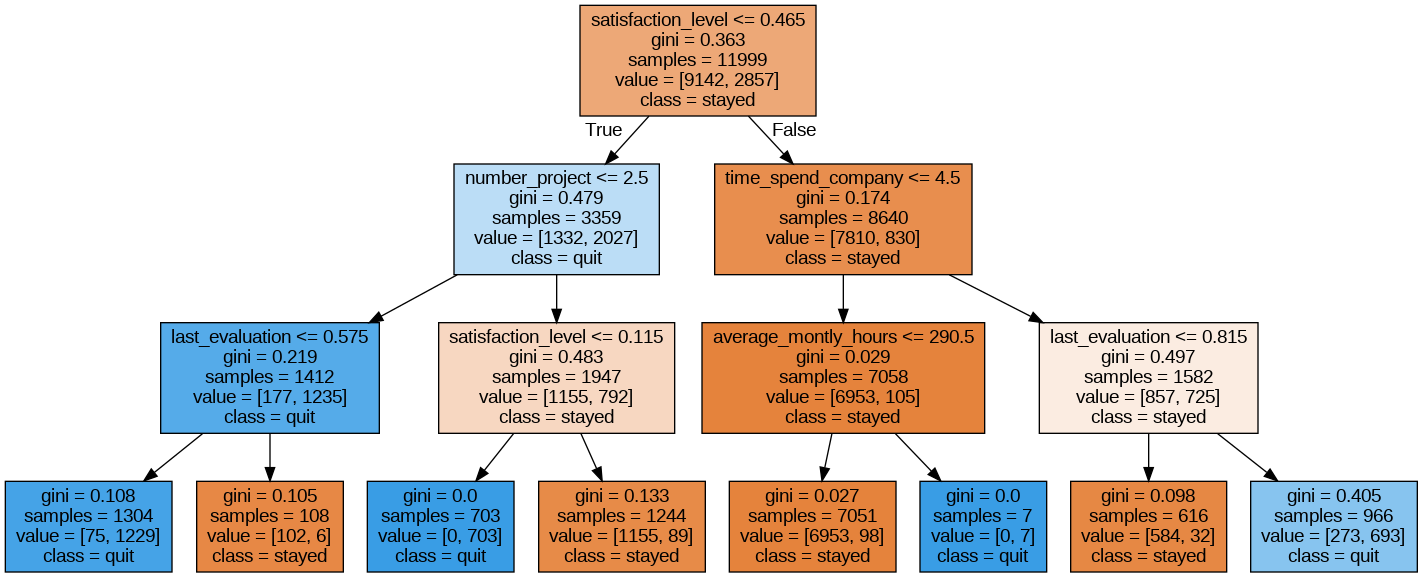

In [ ]:
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import display, Image
#import pydotplus
from graphviz import Source
#Let us use GraphViz to export the model and display it as an image on the screen
# dt_graphviz = tree.export_graphviz(estimator, out_file=None, 
#                                   feature_names = X_train.columns,
#                                   class_names = ['stayed', 'quit'],
#                                   filled = True)
# pydot_graph = pydotplus.graph_from_dot_data(dt_graphviz)
# display(Image(pydot_graph.create_png()))

graph = Source(tree.export_graphviz(dtf, out_file=None, 
                                  feature_names = X_train.columns,
                                  class_names = ['stayed', 'quit'],
                                  filled = True))

display(Image(data=graph.pipe(format = 'png')))

[**Click Here!**](https://ipywidgets.readthedocs.io/en/latest/) to learn more about **ipywidgets**

In [11]:
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets

@interact #To convert any function into an inteactive one just write "@interact" immediately before the function definition

def plot_tree(crit = ['gini', 'entropy'], split = ['best','random'],
                depth = IntSlider(min = 1, max = 25, value =2, continuous_update = False),
                min_split = IntSlider(min = 1, max = 50, value =2, continuous_update = False),
                #min_split is the minimum number of samples  required to split an internal node in our decision tree
                min_leaf = IntSlider(min = 1, max = 50, value =1, continuous_update = False)):
  
    dtf = DecisionTreeClassifier(criterion=crit, splitter=split, max_depth = depth,
                                     min_samples_split = min_split, min_samples_leaf = min_leaf)
    dtf.fit(X_train, y_train)
    a = accuracy_score(y_train, dtf.predict(X_train))
    b = accuracy_score(y_test, dtf.predict(X_test))
    print('Decision Tree Training Accuracy:', round(a,2))
    print('Decision Tree Testing Accuracy:', round(b,2))
    if a > 0.98:
        print('Criterion:',crit,'\n', 'Split:', split,'\n', 'Depth:', depth,'\n', 'Min_split:', 
              min_split,'\n', 'Min_leaf:', min_leaf,'\n')

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

- **min_samples_split**  default=2
The minimum number of samples required to split an internal node
- **min_samples_leaf** default=1
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches

**Advantages** & **Disadvantages** of Decision Tree:

**Advantages:**
- Interpretable and easy to understand
- Can Handle Missing Values
- Feature Selection happens automatically


**Disadvantages:**
- Prone to overfitting
- Tends to add High Variance which means they tend to overfit
- Small changes in data greatly affect prediction
 



**One problem with Decision Tree is that they have Low Bias and High Variance which means they are prone to overfitting on the training set**



Now, let us see what **Underfit**, **Goodfit**, and **Overfit** is:

- **Underfit**
  - Model has not learned anything
  - **Training Accuracy**: **54%**
  - **Testing Accuracy**: **49%**

- **Overfit**
  - Model has memorized everything
  - **Training Accuracy**: **99%**
  - **Testing Accuracy**: **46%**

- **Goodfit**
  - Model has performed well on the testing data as well alongwith the training data 
  - **Training Accuracy**: **93%**
  - **Testing Accuracy**: **91%**



Now, let's use a Random Forest Classifier to overcome the variance problem to get a better generalizable result

### Random Forest Model

In [12]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [13]:
# n_estimators - represents the number of trees in the forest
# max_depth - represents the depth of each tree in the forest
# min_samples_split - epresents the minimum number of samples required to split an internal node.
# min_samples_leaf - is the minimum number of samples required to be at a leaf node
# bootstrap - whether bootstrap samples are used when building trees
# n_jobs - The number of jobs to run in parallel. -1 means using all processors

  
rfc = RandomForestClassifier(random_state = 1,criterion = 'gini', bootstrap = True, n_estimators = 100,
                                   max_depth = 14, min_samples_split = 2, min_samples_leaf = 1, n_jobs = -1,verbose = False)
rfc.fit(X_train, y_train)
a = accuracy_score(y_train, rfc.predict(X_train))
b = accuracy_score(y_test, rfc.predict(X_test))
print('Random Forest Training Accuracy:', round(a,2))
print('Random Forest Testing Accuracy:', round(b,2))  

Random Forest Training Accuracy: 0.99
Random Forest Testing Accuracy: 0.99


In [ ]:
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
@interact
def plot_tree_rf(crit= ['gini','entropy'], bootstrap= ['True', 'False'],
                 depth=IntSlider(min= 1 ,max= 20,value=3, continuous_update=False),
                 forests=IntSlider(min= 1,max= 1000,value= 100,continuous_update=False),
                 min_split=IntSlider(min= 2,max= 5,value= 2, continuous_update=False),
                 min_leaf=IntSlider(min= 1,max= 5,value= 1, continuous_update=False)):
  
    rfc = RandomForestClassifier(random_state = 1, criterion = crit, bootstrap = bootstrap, n_estimators = forests, 
                                       max_depth = depth, min_samples_split = min_split, min_samples_leaf = min_leaf, 
                                       n_jobs = -1, verbose = False)
    rfc.fit(X_train, y_train)

    a = accuracy_score(y_train, rfc.predict(X_train))
    b = accuracy_score(y_test, rfc.predict(X_test))
    print('Random Forest Training Accuracy:', round(a,2))
    print('Random Forest Testing Accuracy:', round(b,2))  
    if a > 0.99:
        print('Criterion:',crit,'\n', 'Bootstrap:', bootstrap,'\n', 'Depth:', depth,'\n', 'forests:', 
              forests,'\n', 'Min_split:', min_split,'\n', 'Min_leaf:', min_leaf,'\n')

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

**Advantages** & **Disadvantages** of Random Forest:

**Advantages:**
- Not prone overfitting
- Runs efficiently huge data sets
- Gives better accuracy than other classification algorithms

**Disadvantages:**
- Computationally Slower
- Found to be biased while dealing with categorical variables
- Although much lower than decision trees, overfitting is still a risk with random forests



### **Model Optimization:** GridSearchCV and RandomizedSearchCV

**GridSearchCV**

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [15]:
# max_features - The number of features to consider when looking for the best split - “auto”, “sqrt”, “log2”, int, float
# default=”auto”
# If int, then consider max_features features at each split.
# If float, then max_features is a fraction and round(max_features * n_features) features are considered at each split.
# If “auto”, then max_features=sqrt(n_features).
# If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
# If “log2”, then max_features=log2(n_features).
# If None, then max_features=n_features


rfc=RandomForestClassifier(random_state=42)

# param_grid = { 
#     'n_estimators': [200, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy']
# }
param_grid = { 
    'n_estimators': [50, 100],
    'max_depth' : [10, 20],
    'criterion' :['gini']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini'], 'max_depth': [10, 20],
                         'n_estimators': [50, 100]})

In [16]:
CV_rfc.best_params_

{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 100}

In [17]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 100, max_depth=20, criterion='gini')
rfc1.fit(X_train, y_train)
pred=rfc1.predict(X_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.9913333333333333


In [18]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
gd_roc=roc_auc_score(y_test, pred)
print("roc auc score", gd_roc)
gd_acc = accuracy_score(y_test, pred)
print('accuracy_score:', gd_acc)
gd_prec = precision_score(y_test, pred)
print('precision score:', gd_prec)
gd_rec = recall_score(y_test, pred)
print('recall score:', gd_rec)
gd_f1 = f1_score(y_test, pred)
print('f1 score:', gd_f1)


roc auc score 0.9832373894439665
accuracy_score: 0.9913333333333333
precision score: 0.9956772334293948
recall score: 0.9677871148459384
f1 score: 0.9815340909090909


**RandomizedSearchCV**

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators

In [19]:
#Randomized Search CV

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
#n_estimators = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
#n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 2)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth = [int(x) for x in np.linspace(10, 20, num = 2)]
#max_depth.append(None)
# Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
# bootstrap = [True, False]
n_estimators = [100,200]
max_features = ['sqrt']
max_depth = [10, 20]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200], 'max_features': ['sqrt'], 'max_depth': [10, 20], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True]}


In [20]:
#Base Model
rfc=RandomForestClassifier(random_state=42)

# rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 15 candidates, totalling 45 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 20],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]},
                   random_state=42, verbose=2)

In [21]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [22]:
# rfc1=RandomForestClassifier(random_state=42, bootstrap = False,
#  max_depth = 70,
#  max_features= 'sqrt',
#  min_samples_leaf = 1,
#  min_samples_split= 5,
#  n_estimators= 1600)

rfc1=RandomForestClassifier(random_state=42, bootstrap = True,
 max_depth = 20,
 max_features= 'sqrt',
 min_samples_leaf = 1,
 min_samples_split= 2,
 n_estimators= 200)

rfc1.fit(X_train, y_train)
pred=rfc1.predict(X_test)


###**Model Evaluation**

**Accuracy:** No. of correct predictions made by the model over all kinds predictions made

**When to use Accuracy:**

Accuracy is a good measure when the target variable classes in the data are nearly balanced. For example, No. of people who Survived Titanic (60% yes - 40% no)

In [23]:
print("Accuracy: ",accuracy_score(y_test,pred))

Accuracy:  0.991


**Confusion Matrix:**
 Gives the Performance of a classification model on a set of test data for which the true values are known.

A way to visualize **Precision** and **Recall**

**When to use Confusion Matrix:** When we have an Imbalanced Classification Task



In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[2283,    3],
       [  24,  690]])

- **Precision:**
  - What percebtage of positive predictions made were correct? This is **Precision**
  - No. of True Positives divided by the no. of True Positives plus the No. of False Positives
 
- **Recall:** Ratio of True Positives to all the positives in your Dataset

- **When to use Precision & Recall:** 
 - In the credit card fraud detection task, lets say we modify the model slightly, and identify a single transaction correctly as fraud. 

 - Now, our precision will be 1.0 (no false positives) but our recall will be very low because we will still have many false negatives. 

 - If we go to the other extreme and classify all transactions as fraud, we will have a recall of 1.0 — we’ll catch every fraud transaction — but our precision will be very low and we’ll misclassify many legit transactions. In other words, as we increase precision we decrease recall and vice-versa.

- **F1-Score:**
 F1 Score is the weighted average of Precision and Recall. F1 is usually more useful than accuracy, especially when we have an uneven class distribution

 - **When to use F1-Score:** 
   - Useful when you have data with imbalance classes
   - Let us say, we have a model with a precision of 1, and recall of 0 which gives a simple average as 0.5 and an F1 score of 0
   - If one of the parameters is low, the second one no longer matters in the F1 score 
   - The F1 score favors classifiers that have similar precision and recall
   - F1 score is a better measure to use if you are seeking a balance between Precision and Recall


In [25]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

roc=roc_auc_score(y_test, pred)
acc = accuracy_score(y_test, pred)
prec = precision_score(y_test, pred)
rec = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)


print("roc auc score", roc)
print('accuracy_score:', acc)
print('precision score:', prec)
print('recall score:', rec)
print('f1 score:', f1)

roc auc score 0.9825371093319217
accuracy_score: 0.991
precision score: 0.9956709956709957
recall score: 0.9663865546218487
f1 score: 0.9808102345415779


In [26]:

results = pd.DataFrame([['RandomizedSearchCV', acc,prec,rec, f1,roc], 
                        ['GridSearchCV',gd_acc, gd_prec, gd_rec, gd_f1, gd_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,RandomizedSearchCV,0.991000,0.995671,0.966387,0.980810,0.982537
1,GridSearchCV,0.991333,0.995677,0.967787,0.981534,0.983237


**Saving the model and dumping it to a pickle file**

In [27]:
import pickle 

filename = 'final_model.sav'
pickle.dump(rfc1, open(filename, 'wb'))
 

###**Interpreting Employee Attrition Prediction With SHAP**


**SHAP** (SHapley Additive exPlanations) :break down a prediction to show the impact of each feature

**Install SHAP**: pip install shap

In [28]:
#Installing SHAP
!pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 21.8 MB/s eta 0:00:00


In [33]:
import shap

**shap.summary_plot function**

- Produces the variable importance plot
- A variable importance plot lists the most significant variables in descending order
- The top variables contribute more to the model than the bottom ones and thus have high predictive power

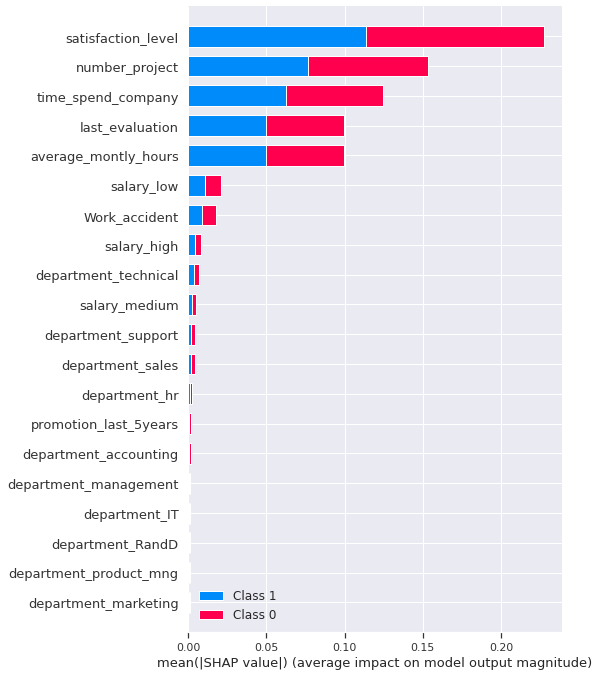

In [34]:
# shap_values = shap.TreeExplainer(rfc1).shap_values(X_train)
# shap.summary_plot(shap_values, X_train, plot_type="bar")
Xtr,Xte,ytr,yte = train_test_split(X_test, y_test, random_state = 0, test_size=0.1, stratify = y_test)
shap_values = shap.TreeExplainer(rfc1).shap_values(Xtr)
shap.summary_plot(shap_values, Xte, plot_type="bar")

In [ ]:
# Dependency Plot
# - Shows the effect a single feature has on the prediction
# - How much the prediction depends on a particular feature
# - shap.dependence_plot(indexoffeature,matrix_shap_values,dataset_matrix)
# type(shap_values), type(shap_values[0])
# shap.dependence_plot('satisfaction_level', shap_values[0], Xtr)

In [29]:
rfc1.feature_importances_

array([0.30964611, 0.12366108, 0.18395415, 0.15068208, 0.18312717,
       0.01073233, 0.00154004, 0.0017541 , 0.00177199, 0.00153661,
       0.00161187, 0.00142733, 0.00101425, 0.00115065, 0.00327787,
       0.00280232, 0.00354233, 0.00590086, 0.00748067, 0.00338617])

In [30]:
X_train.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [31]:
feature_imp = pd.Series(rfc1.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp[:10]

satisfaction_level      0.309646
number_project          0.183954
time_spend_company      0.183127
average_montly_hours    0.150682
last_evaluation         0.123661
Work_accident           0.010732
salary_low              0.007481
salary_high             0.005901
department_technical    0.003542
salary_medium           0.003386
dtype: float64

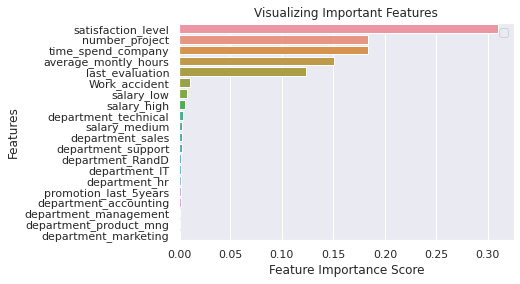

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

###**PyCaret**


Use **PyCaret** to find the best model and perform Automatic Hyperparameter tuning

**NOTE:** It is alwasy used in Industry as a Directional Tool

**PyCaret** is an open source, low-code machine learning library in **Python** that allows you to go from preparing your data to deploying your model within minutes in your choice of notebook environment

[**Click Here!**](https://pycaret.org/) to learn more about **PyCaret**

**Installing PyCaret**

- !pip install pycaret

####**Tasks to be performed**

- Import PyCaret and load the data set
- Initialize or setup the environment 
- Compare Multiple Models and their Accuracy Metrics
- Create the model
- Tune the model
- Evaluate the model


####**Import PyCaret and load the data set**

In [ ]:
!pip install pycaret

In [36]:
pip install scikit-learn==0.23.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pycaret.classification as pc
#dir(pc)

In [2]:
#Loading the dataset
import pandas as pd
df = pd.read_csv('/content/employee_data.csv')

df.head() #Printing the first 5 rows of dataframe

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


####**Initialize or setup the environment**

In [5]:
pc.setup(df, target='quit', categorical_features=['department','salary'],
         use_gpu=True, silent=True, verbose=False)

INFO:logs:PyCaret Supervised Module
INFO:logs:ML Usecase: classification
INFO:logs:version 2.3.10
INFO:logs:Initializing setup()
INFO:logs:setup(target=quit, ml_usecase=classification, available_plots={'parameter': 'Hyperparameters', 'auc': 'AUC', 'confusion_matrix': 'Confusion Matrix', 'threshold': 'Threshold', 'pr': 'Precision Recall', 'error': 'Prediction Error', 'class_report': 'Class Report', 'rfe': 'Feature Selection', 'learning': 'Learning Curve', 'manifold': 'Manifold Learning', 'calibration': 'Calibration Curve', 'vc': 'Validation Curve', 'dimension': 'Dimensions', 'feature': 'Feature Importance', 'feature_all': 'Feature Importance (All)', 'boundary': 'Decision Boundary', 'lift': 'Lift Chart', 'gain': 'Gain Chart', 'tree': 'Decision Tree', 'ks': 'KS Statistic Plot'}, train_size=0.7, test_data=None, preprocess=True, imputation_type=simple, iterative_imputation_iters=5, categorical_features=['department', 'salary'], categorical_imputation=constant, categorical_iterative_imputer=

(       satisfaction_level  last_evaluation  average_montly_hours  \
 713                  0.73             0.92                 232.0   
 12094                0.09             0.83                 255.0   
 5183                 0.55             0.71                 181.0   
 11509                0.75             0.87                 146.0   
 12089                0.10             0.79                 291.0   
 ...                   ...              ...                   ...   
 4592                 0.89             0.90                 240.0   
 6394                 0.72             0.70                 238.0   
 3409                 0.58             0.86                 206.0   
 8156                 0.45             0.75                 246.0   
 923                  0.44             0.50                 156.0   
 
        number_project_2  number_project_3  number_project_4  number_project_5  \
 713                 0.0               0.0               0.0               1.0   
 12094

####**Compare Multiple Models and their Accuracy Metrics**

In [6]:
pc.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9868,0.9906,0.9575,0.9864,0.9717,0.9630,0.9633,1.059
lightgbm,Light Gradient Boosting Machine,0.9843,0.9925,0.9506,0.9826,0.9663,0.9561,0.9563,0.215
et,Extra Trees Classifier,0.9804,0.9899,0.9518,0.9652,0.9584,0.9455,0.9457,1.362
gbc,Gradient Boosting Classifier,0.9757,0.9880,0.9262,0.9703,0.9476,0.9318,0.9323,1.084
dt,Decision Tree Classifier,0.9728,0.9682,0.9595,0.9283,0.9436,0.9256,0.9259,0.064
ada,Ada Boost Classifier,0.9599,0.9810,0.9085,0.9218,0.9149,0.8887,0.8889,0.426
knn,K Neighbors Classifier,0.9328,0.9659,0.8981,0.8324,0.8639,0.8193,0.8205,0.521
lr,Logistic Regression,0.8994,0.9374,0.8062,0.7785,0.7919,0.7257,0.7260,1.324
ridge,Ridge Classifier,0.8849,0.0000,0.8150,0.7315,0.7708,0.6943,0.6963,0.063
lda,Linear Discriminant Analysis,0.8847,0.9284,0.8491,0.7175,0.7776,0.7005,0.7052,0.129


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2260, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2260, verbose=0,
                       warm_start=False)

**Note:** Don't worry about the models. You are gonna learn most of them in the coming modules

####**Create the Model**



In [7]:
rf_model = pc.create_model('rf') #Performs K-Fold (10) CV for the selected model

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9857,0.9935,0.9600,0.9796,0.9697,0.9604,0.9604
1,0.9886,0.9898,0.9640,0.9877,0.9757,0.9682,0.9684
2,0.9857,0.9842,0.9478,0.9916,0.9692,0.9599,0.9603
3,0.9790,0.9753,0.9357,0.9749,0.9549,0.9413,0.9416
4,0.9876,0.9935,0.9719,0.9758,0.9738,0.9657,0.9657
5,0.9876,0.9944,0.9639,0.9836,0.9736,0.9655,0.9656
6,0.9857,0.9927,0.9398,1.0000,0.9689,0.9597,0.9605
7,0.9905,0.9965,0.9679,0.9918,0.9797,0.9735,0.9736
8,0.9876,0.9958,0.9639,0.9836,0.9736,0.9655,0.9656


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2260, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


####**Tune the Model**

In [8]:
tuned_rf = pc.tune_model(rf_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9733,0.9715,0.9160,0.9703,0.9424,0.9251,0.9257
1,0.9714,0.9763,0.9200,0.9583,0.9388,0.9202,0.9205
2,0.9790,0.9773,0.9357,0.9749,0.9549,0.9413,0.9416
3,0.9657,0.9557,0.8956,0.9571,0.9253,0.9031,0.9039
4,0.9714,0.9778,0.9197,0.9582,0.9385,0.9199,0.9203
5,0.9743,0.9711,0.9036,0.9868,0.9434,0.9268,0.9283
6,0.9752,0.9734,0.9157,0.9785,0.9461,0.9300,0.9309
7,0.9810,0.9767,0.9317,0.9872,0.9587,0.9463,0.9470
8,0.9733,0.9818,0.9277,0.9585,0.9429,0.9255,0.9257


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=8, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.005, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=2260, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [9]:
print(rf_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2260, verbose=0,
                       warm_start=False)


In [10]:
print(tuned_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=8, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.005, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=2260, verbose=0,
                       warm_start=False)


See the difference between the original model (**rf_model**) and the tuned model (**tuned_rf**)

####**Evaluate the Model**

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=8, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.005, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=2260, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

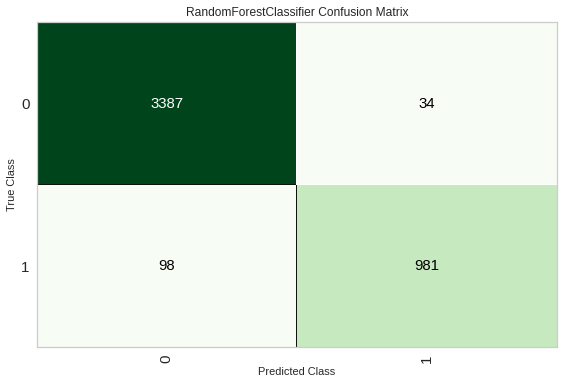

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


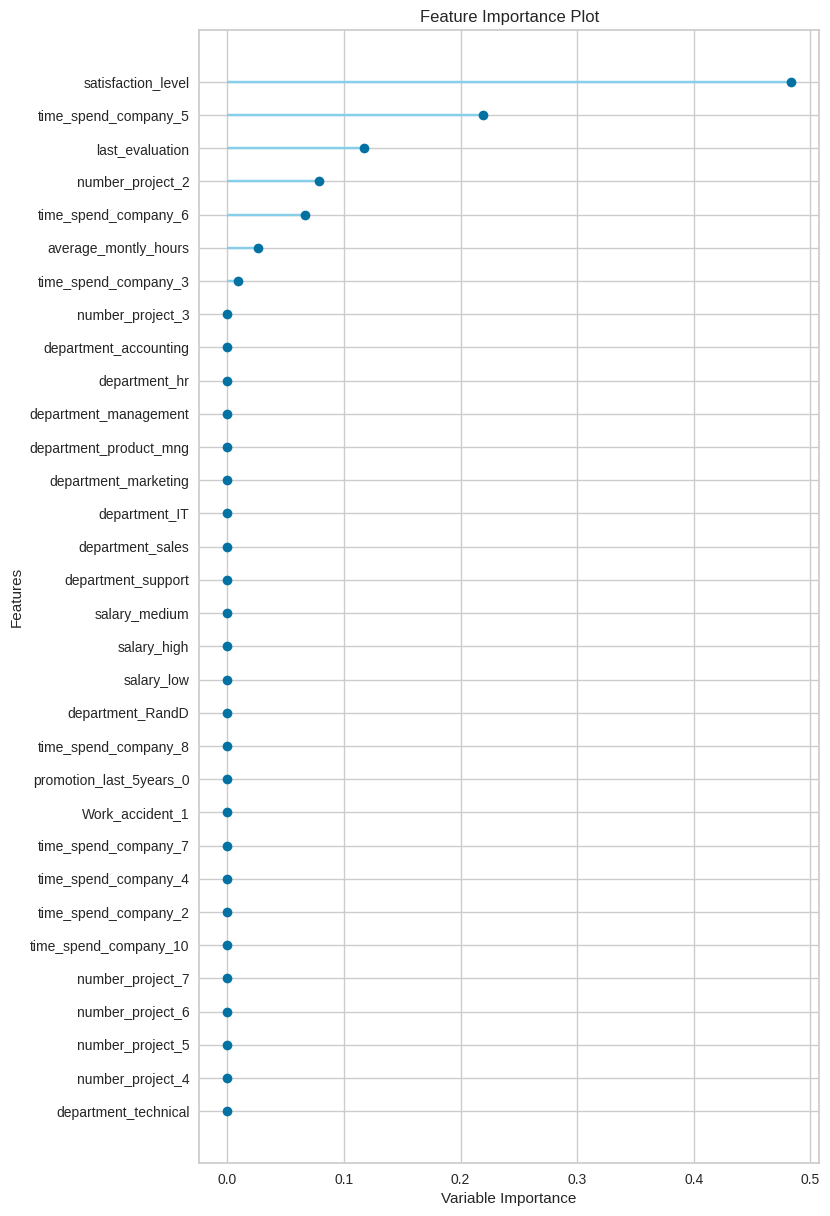

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [12]:
tuned_rf_eval = pc.evaluate_model(tuned_rf)

###**Deploying the Model Using Streamlit**

Go to your local system and use a text editor such as **Sublime Text** to deploy your app using the pickle file genereated

In [ ]:
import pickle 

filename = 'rfc.pkl'
pickle.dump(rf_model, open(filename, 'wb'))

- **Save the next cell as a .py file**
- **Run it in your local system** (streamlit run filename.py)

In [ ]:
from pycaret.classification import load_model, predict_model
import streamlit as st
import pandas as pd
import numpy as np

#Loading Trained Model
model = load_model('Final_model')


def predict(model, input_df):
    predictions_df = predict_model(estimator=model, data=input_df)
    #predict_model function takes a trained model object and the dataset to predict
    
    predictions = predictions_df['Label'][0]
    return predictions


st.title('Employee Attrition Prediction Web App')

satisfaction_level=st.number_input('satisfaction_level' , min_value=0.1, max_value=1.0, value=0.1)
last_evaluation =st.number_input('last_evaluation',min_value=0.1, max_value=1.0, value=0.1)
number_project = st.number_input('number_project', min_value=0, max_value=50, value=5)
time_spend_company = st.number_input('time_spend_company', min_value=1, max_value=10, value=3)
Work_accident = st.number_input('Work_accident',  min_value=0, max_value=50, value=0)
promotion_last_5years = st.number_input('promotion_last_5years',  min_value=0, max_value=50, value=0)
salary = st.selectbox('salary', ['low', 'high','medium'])
average_montly_hours = st.number_input('average_montly_hours',  min_value=96, max_value=310, value=100)
department = st.selectbox('department', ['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'])


output=""

input_dict={'satisfaction_level':satisfaction_level,'last_evaluation':last_evaluation,'number_project':number_project,'time_spend_company':time_spend_company,'Work_accident': Work_accident,'promotion_last_5years':promotion_last_5years,'salary' : salary, 'average_montly_hours':average_montly_hours, 'department':department}


input_df = pd.DataFrame([input_dict])
print(input_df)

if st.button("Predict"):
	output = predict(model=model, input_df=input_df)
	output = str(output)
        
if output=='1':
	st.success('Employee will leave the company')
else:
	st.success('Employee will stay')